In [189]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle


In [190]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)

In [191]:
df = pd.read_csv("../../data/apple_quality.csv")

In [192]:
# prepare data
df = df.sample(frac=0.2, random_state=RANDOM_STATE)  # get only fraction of the dataset
df = df.dropna()  # remove rows that include NaNs
df["Quality"] = df["Quality"].apply(
    lambda x: 1 if x == "good" else 0
)  # good -> 1; bad -> 0
df = df.drop(columns=["A_id"], errors="ignore")
df["Acidity"] = df["Acidity"].astype("float64")

In [193]:
shuffled_df = shuffle(
    list(zip(np.array(df.loc[:, df.columns != "Quality"]), np.array(df["Quality"]))),
    random_state=RANDOM_STATE,
)
X, y = [t[0] for t in shuffled_df],[t[1] for t in shuffled_df]

training_data_percent = 0.80
training_size = int(len(X) * training_data_percent)
testing_size = len(X) - training_size
X_train, y_train = np.array(X[:training_size]), np.array(y[:training_size])
X_test, y_test = np.array(X[-testing_size:]), np.array(y[-testing_size:])

In [194]:
# Scaling features
# should be done separately for training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)
y_train_torch = torch.LongTensor(y_train)
y_test_torch = torch.LongTensor(y_test)

# DataLoader
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Model Definition
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super(BinaryClassificationModel, self).__init__()
        self.layer1 = nn.Linear(7, 64)  # Input layer to hidden layer
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

model = BinaryClassificationModel()

# 3. Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Confirm setup
"Dataset, Model, Loss, and Optimizer are set up. Ready to proceed with training."



'Dataset, Model, Loss, and Optimizer are set up. Ready to proceed with training.'

In [195]:
# 4. Training Loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels.float())  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize
        running_loss += loss.item() * inputs.size(0)  # Update running loss
        
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# 5. Evaluation
model.eval()  # Set the model to evaluation mode
total, correct = 0, 0
with torch.no_grad():  # Inference mode, no need to calculate gradients
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.squeeze() > 0.5).long()  # Convert probabilities to binary output
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
accuracy


Epoch 1/100, Loss: 0.6813
Epoch 2/100, Loss: 0.6448
Epoch 3/100, Loss: 0.6142
Epoch 4/100, Loss: 0.5884
Epoch 5/100, Loss: 0.5636
Epoch 6/100, Loss: 0.5423
Epoch 7/100, Loss: 0.5233
Epoch 8/100, Loss: 0.5064
Epoch 9/100, Loss: 0.4907
Epoch 10/100, Loss: 0.4774
Epoch 11/100, Loss: 0.4644
Epoch 12/100, Loss: 0.4534
Epoch 13/100, Loss: 0.4429
Epoch 14/100, Loss: 0.4337
Epoch 15/100, Loss: 0.4243
Epoch 16/100, Loss: 0.4168
Epoch 17/100, Loss: 0.4092
Epoch 18/100, Loss: 0.4021
Epoch 19/100, Loss: 0.3962


Epoch 20/100, Loss: 0.3895
Epoch 21/100, Loss: 0.3845
Epoch 22/100, Loss: 0.3791
Epoch 23/100, Loss: 0.3736
Epoch 24/100, Loss: 0.3688
Epoch 25/100, Loss: 0.3644
Epoch 26/100, Loss: 0.3602
Epoch 27/100, Loss: 0.3557
Epoch 28/100, Loss: 0.3519
Epoch 29/100, Loss: 0.3481
Epoch 30/100, Loss: 0.3447
Epoch 31/100, Loss: 0.3412
Epoch 32/100, Loss: 0.3375
Epoch 33/100, Loss: 0.3341
Epoch 34/100, Loss: 0.3315
Epoch 35/100, Loss: 0.3285
Epoch 36/100, Loss: 0.3256
Epoch 37/100, Loss: 0.3227
Epoch 38/100, Loss: 0.3201
Epoch 39/100, Loss: 0.3177
Epoch 40/100, Loss: 0.3153
Epoch 41/100, Loss: 0.3133
Epoch 42/100, Loss: 0.3108
Epoch 43/100, Loss: 0.3088
Epoch 44/100, Loss: 0.3065
Epoch 45/100, Loss: 0.3047
Epoch 46/100, Loss: 0.3031
Epoch 47/100, Loss: 0.3010
Epoch 48/100, Loss: 0.2995
Epoch 49/100, Loss: 0.2980
Epoch 50/100, Loss: 0.2961
Epoch 51/100, Loss: 0.2948
Epoch 52/100, Loss: 0.2927
Epoch 53/100, Loss: 0.2913
Epoch 54/100, Loss: 0.2901
Epoch 55/100, Loss: 0.2886
Epoch 56/100, Loss: 0.2872
E

0.925

In [196]:
results = model(X_test_torch)

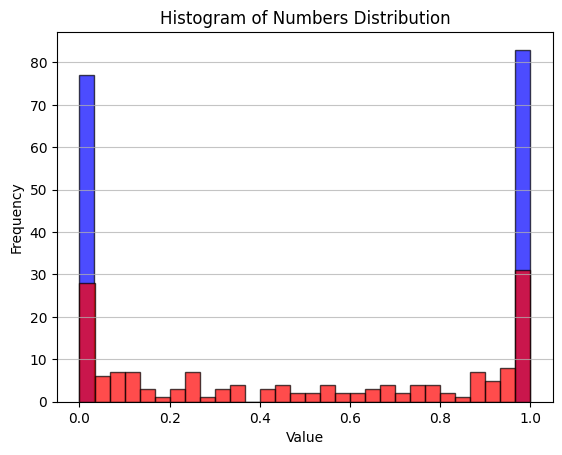

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data

# Create a histogram
plt.hist(y_test, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(results.detach().numpy(), bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Histogram of Numbers Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
